Data cleaning completed successfully: (4181, 6)
Data cleaning completed successfully: (79456, 6)
Data cleaning completed successfully: (79548, 6)
✓ Technical indicators (SMA, EMA, MACD, RSI) added.
✓ Technical indicators (SMA, EMA, MACD, RSI) added.
✓ Technical indicators (SMA, EMA, MACD, RSI) added.
✓ Trading signals (SMA, EMA, MACD, RSI) generated.
✓ Trading signals (SMA, EMA, MACD, RSI) generated.
✓ Trading signals (SMA, EMA, MACD, RSI) generated.

--- Visualizing EURUSD Daily Signals without Gaps ---
Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/SMA_Crossover_Daily_20240101.png


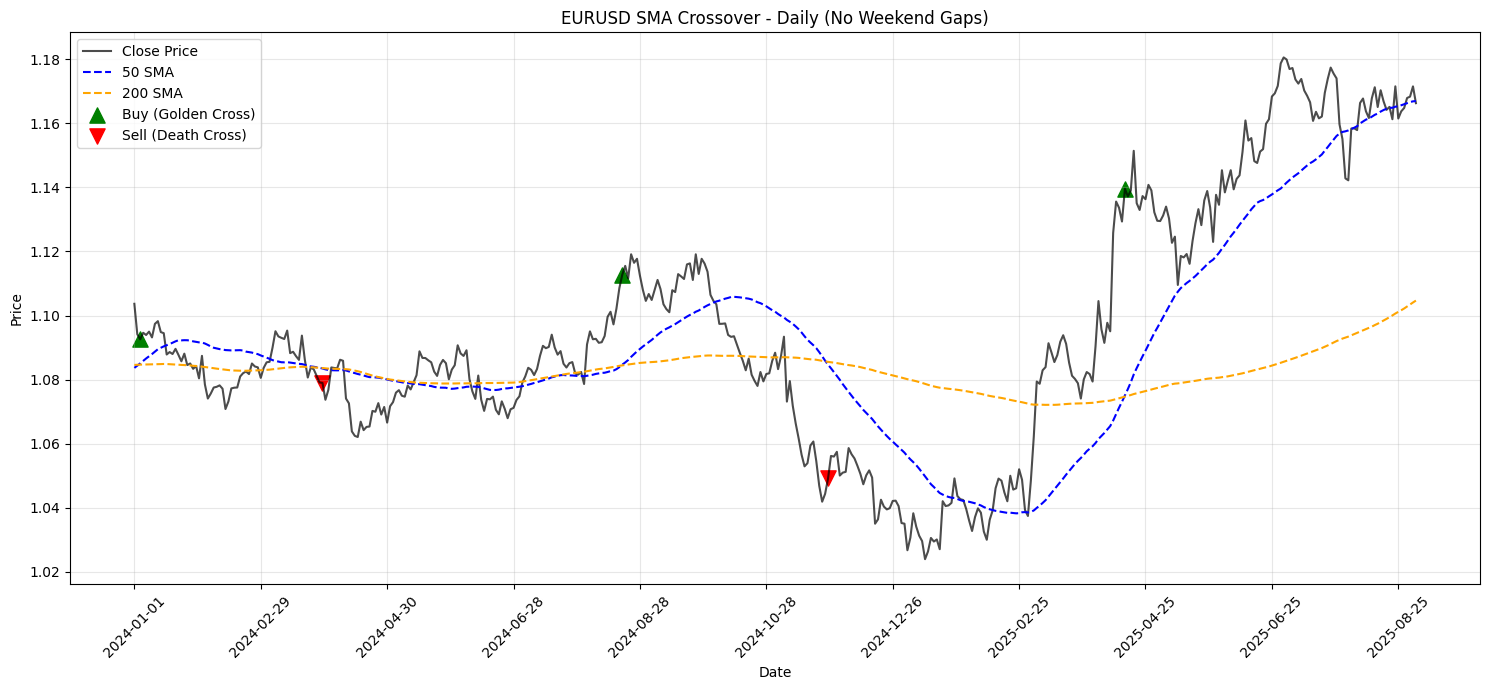

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/EMA_Crossover_Daily_20240101.png


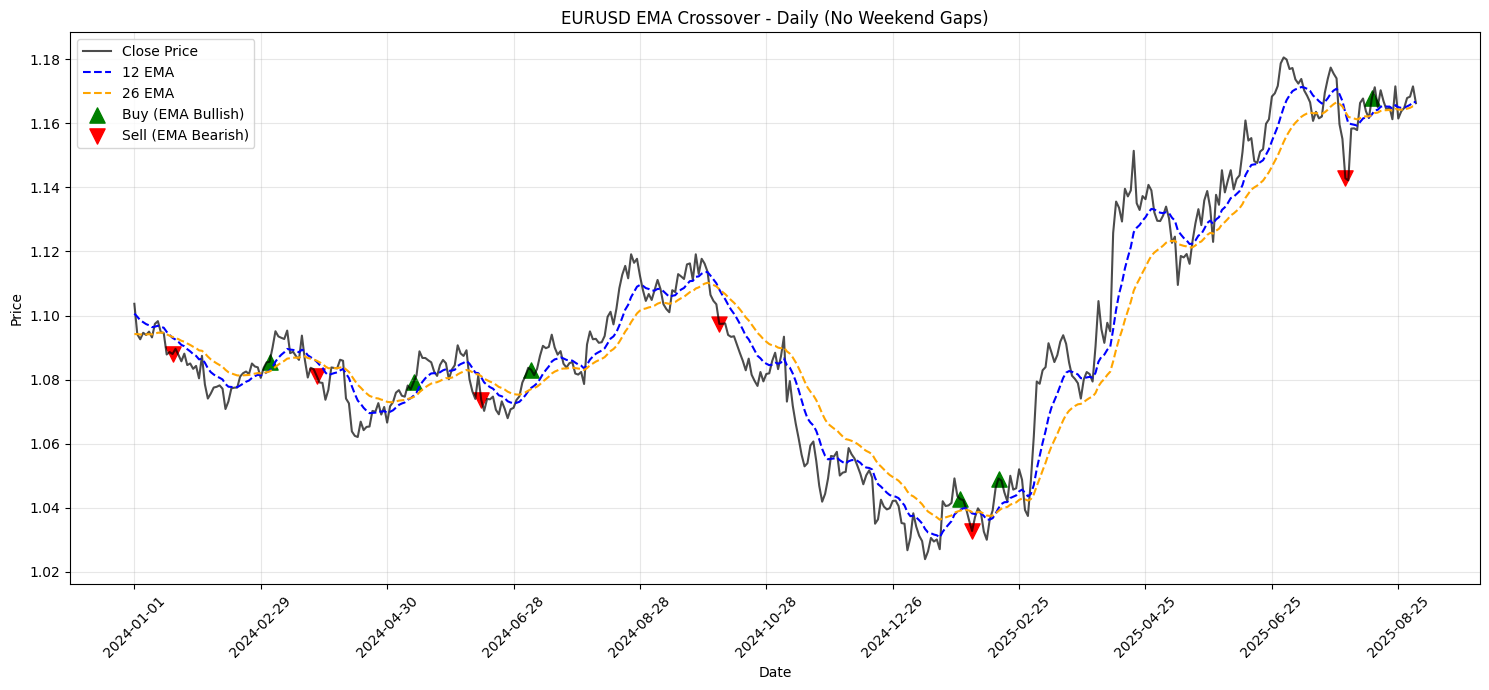

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/MACD_Signals_Daily_20240101.png


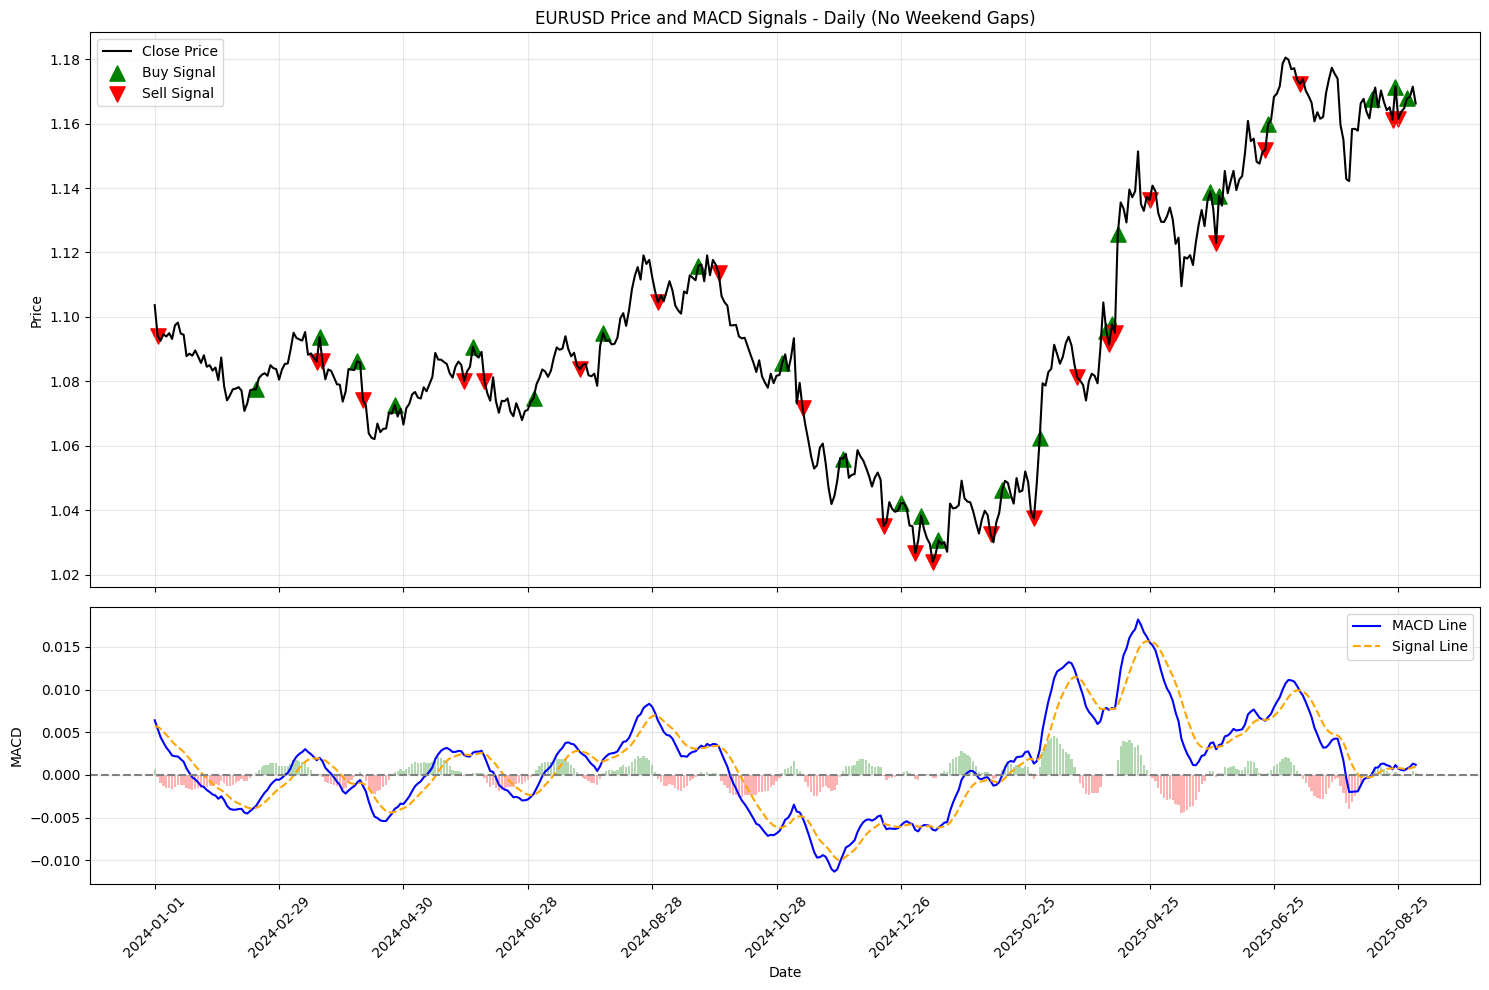

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/RSI_Signals_Daily_20240101.png


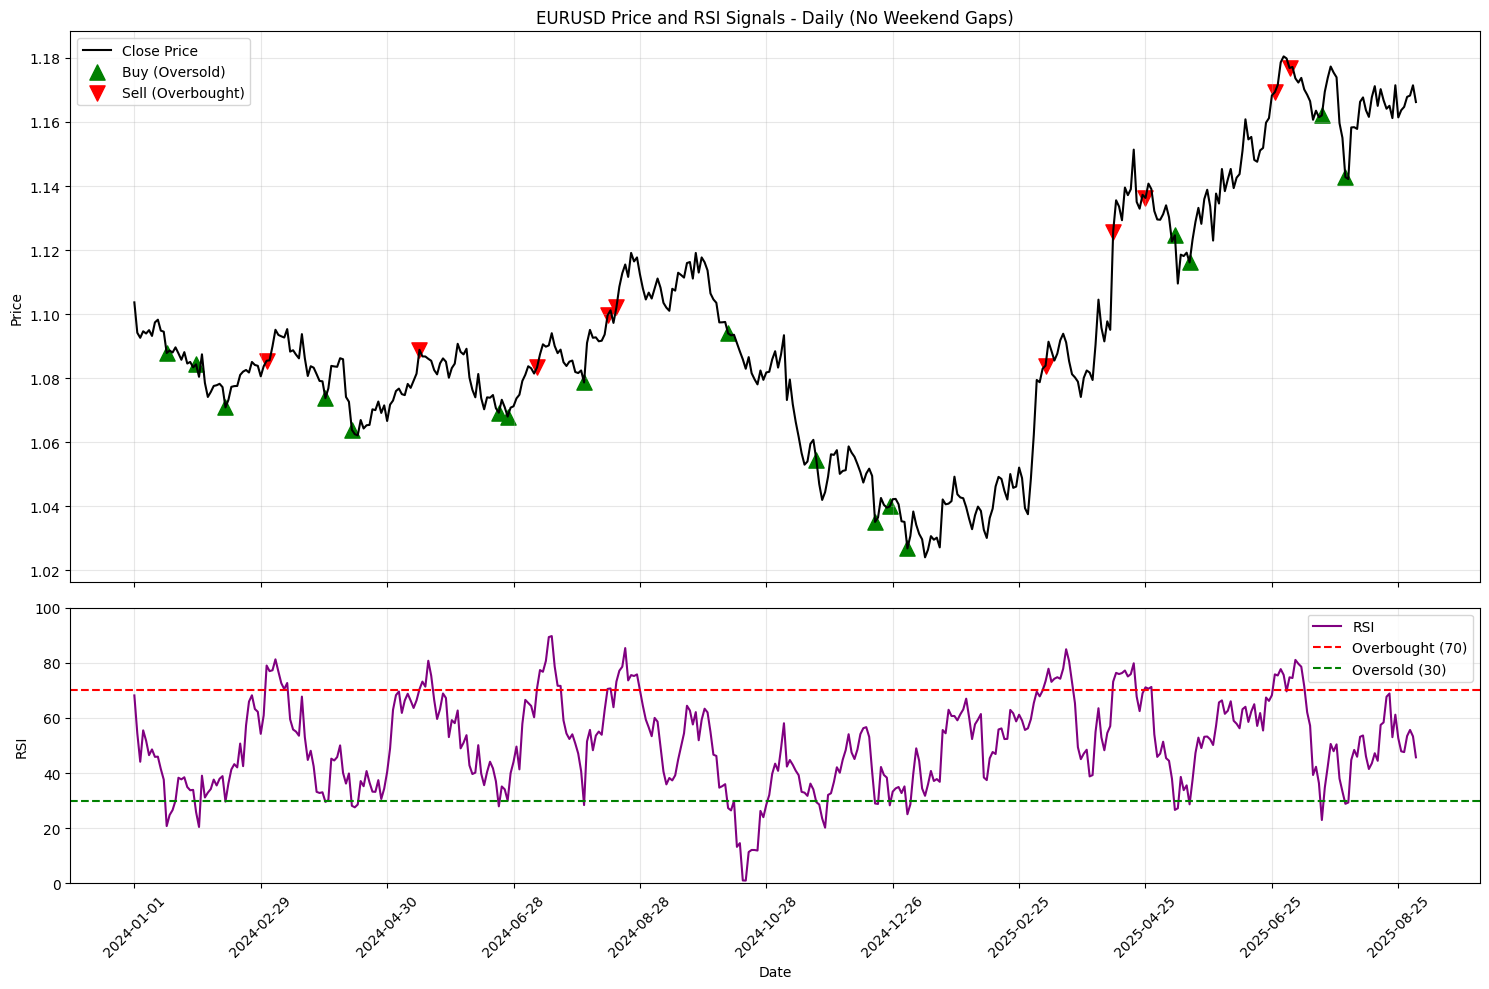


--- Visualizing EURUSD 1H Signals without Gaps ---
Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/SMA_Crossover_1H_20250601.png


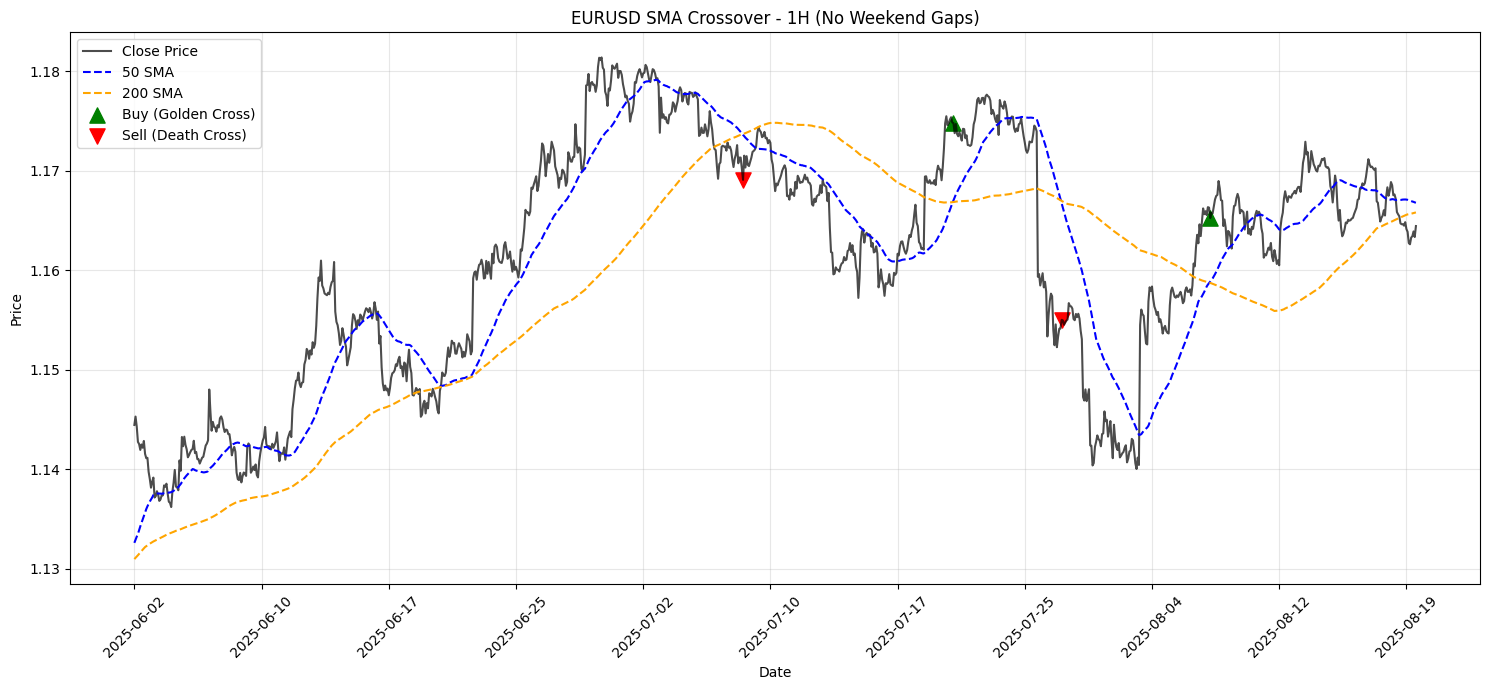

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/EMA_Crossover_1H_20250601.png


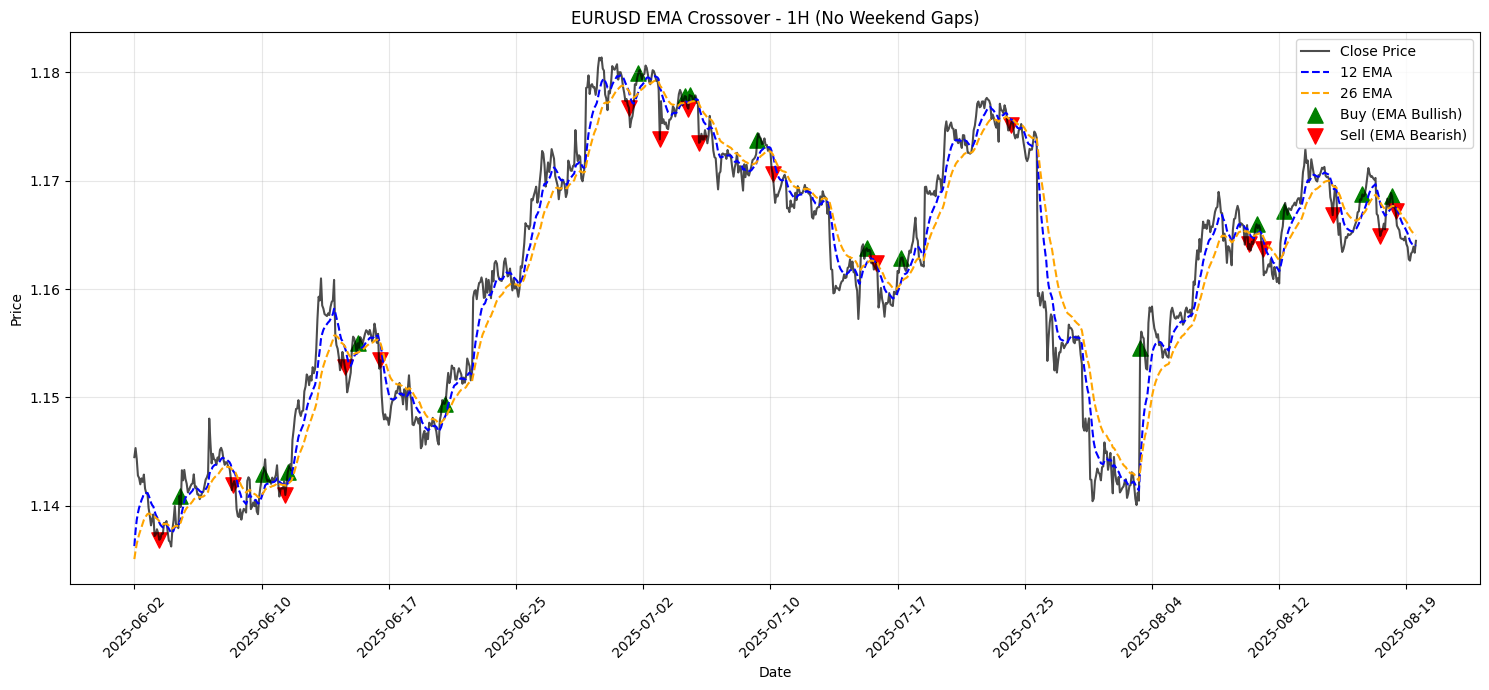

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/MACD_Signals_1H_20250601.png


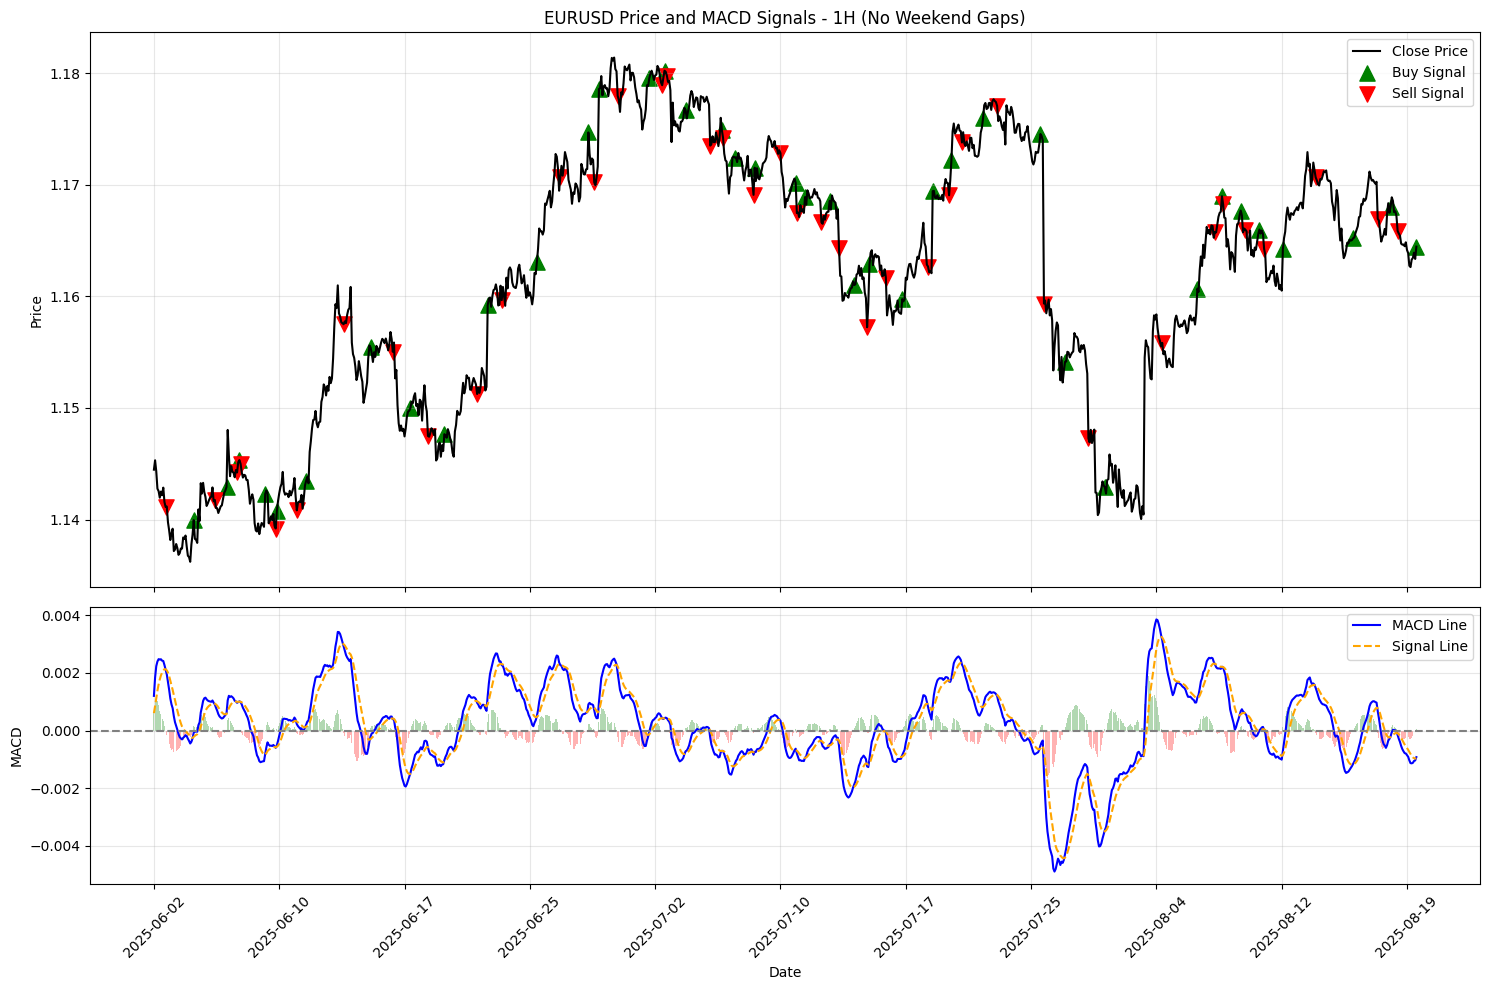

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/RSI_Signals_1H_20250601.png


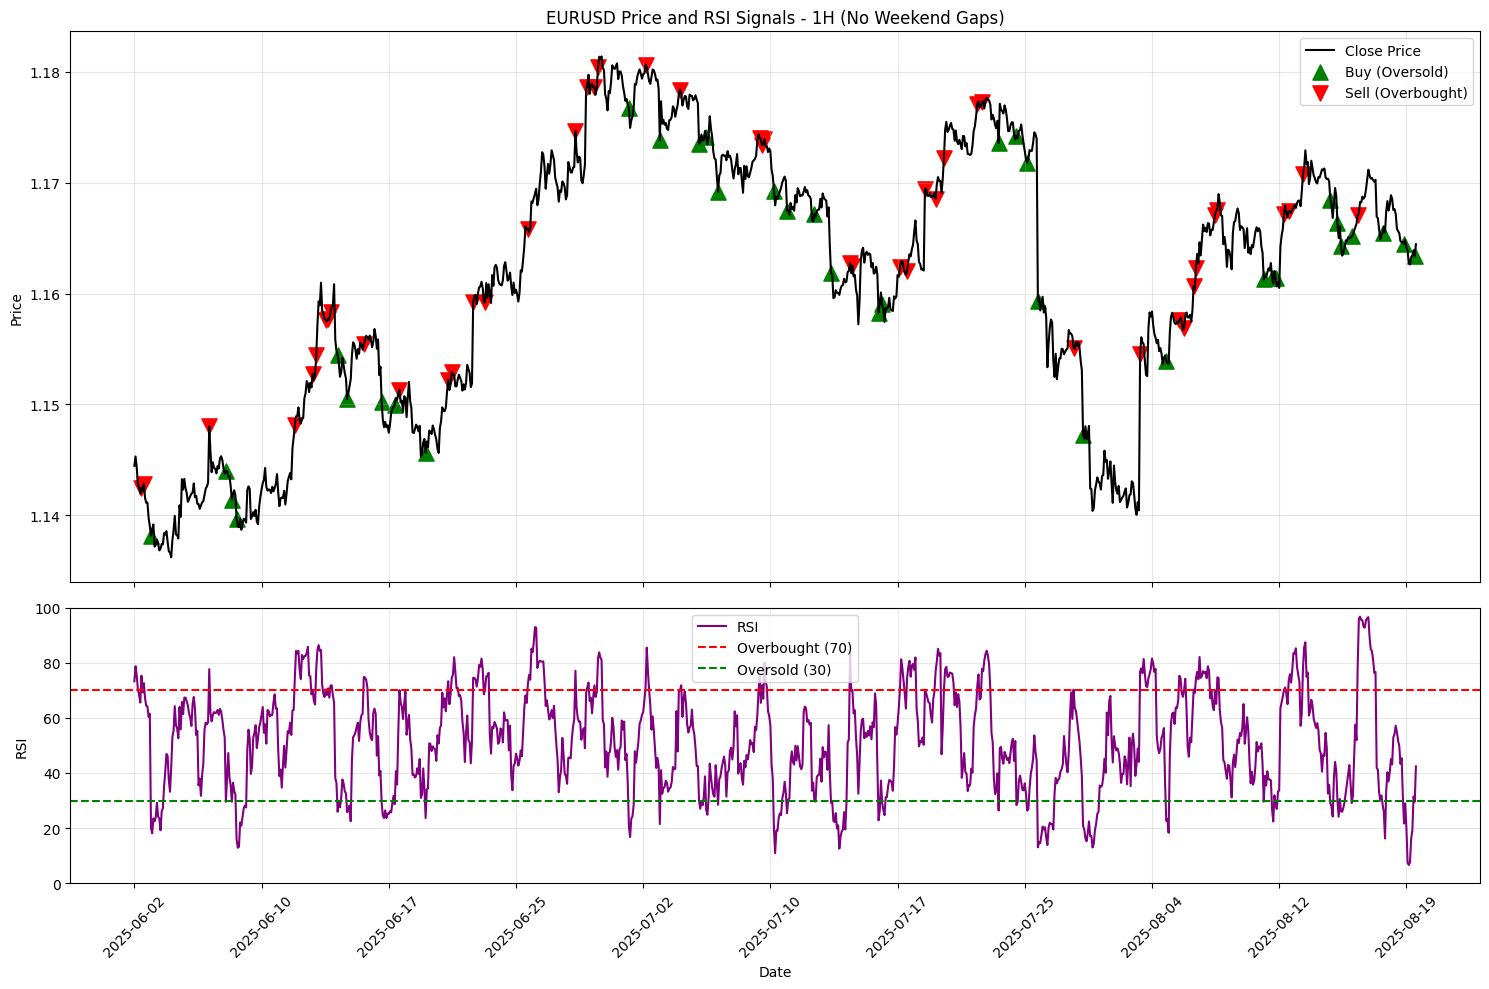


--- Visualizing EURUSD M15 Signals for Latest Month (No Gaps) ---
Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/SMA_Crossover_15M_20250801.png


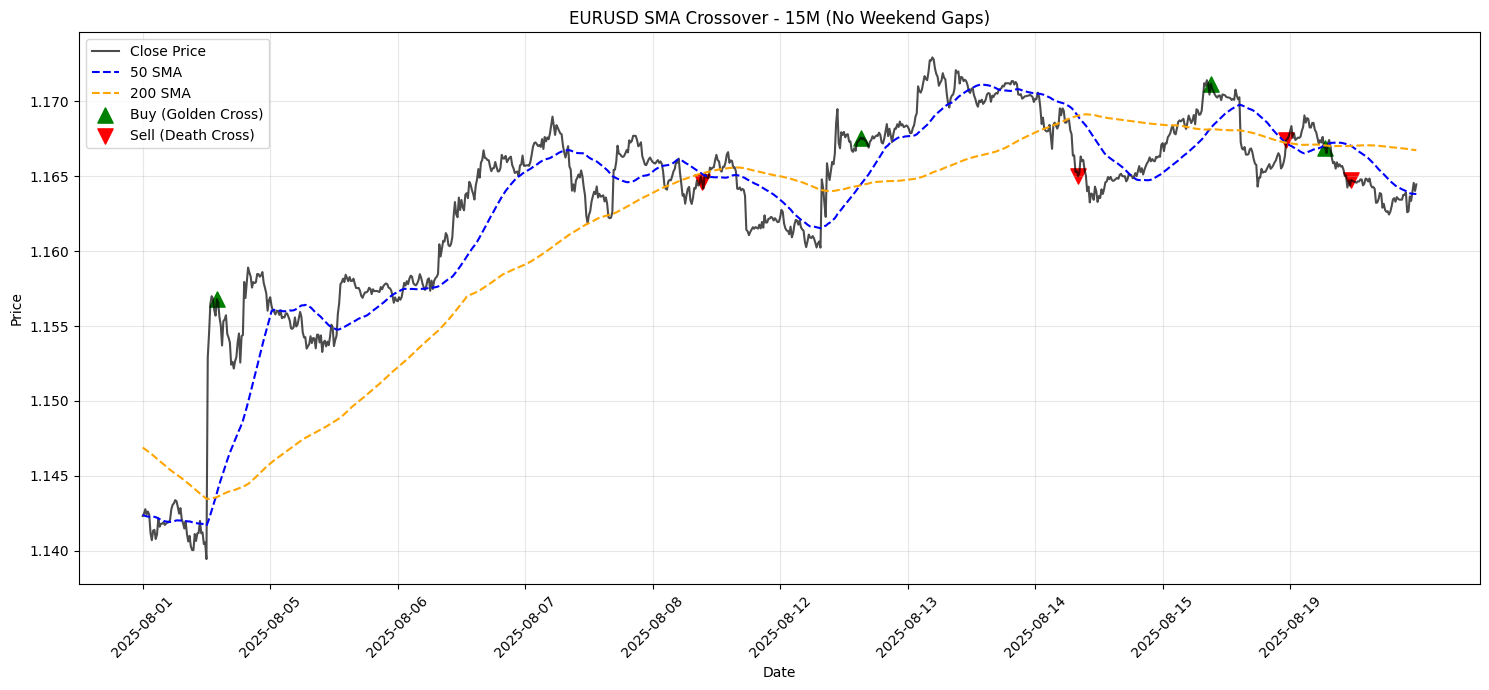

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/EMA_Crossover_15M_20250801.png


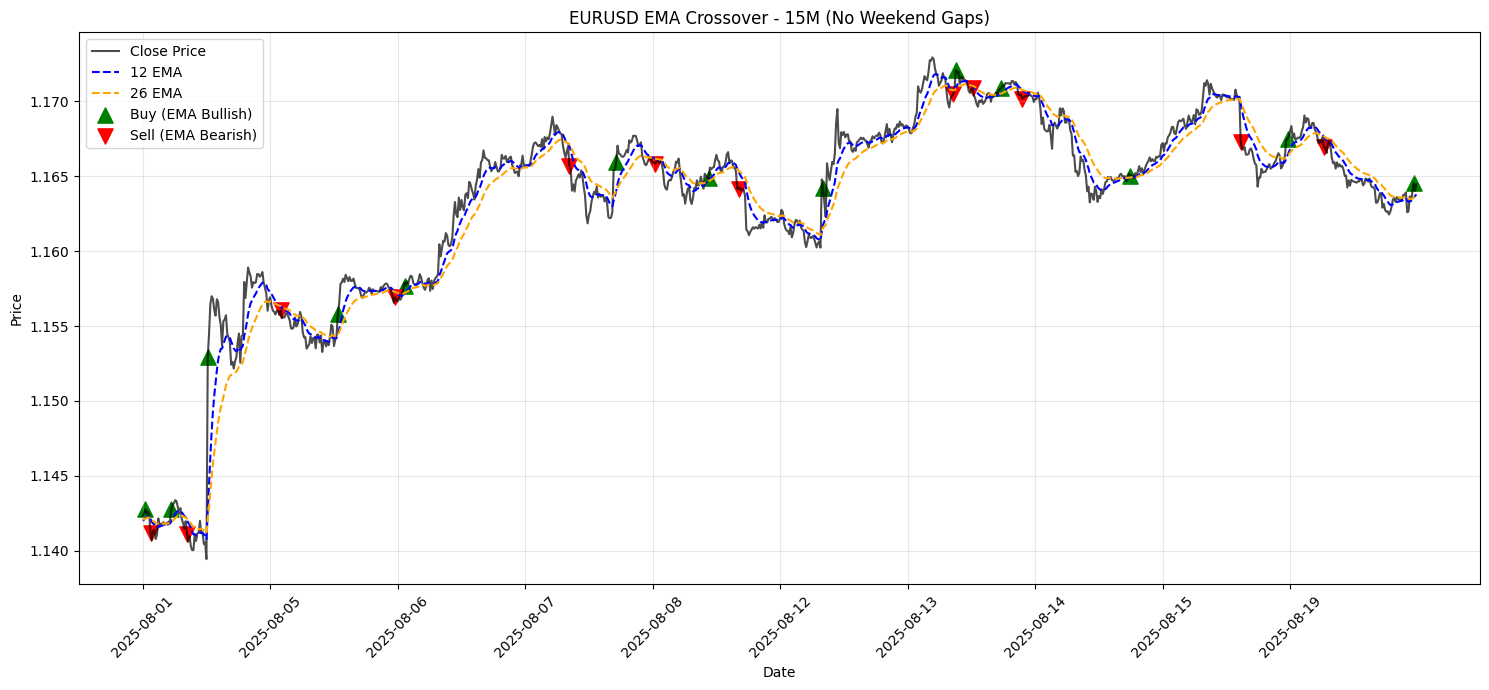

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/MACD_Signals_15M_20250801.png


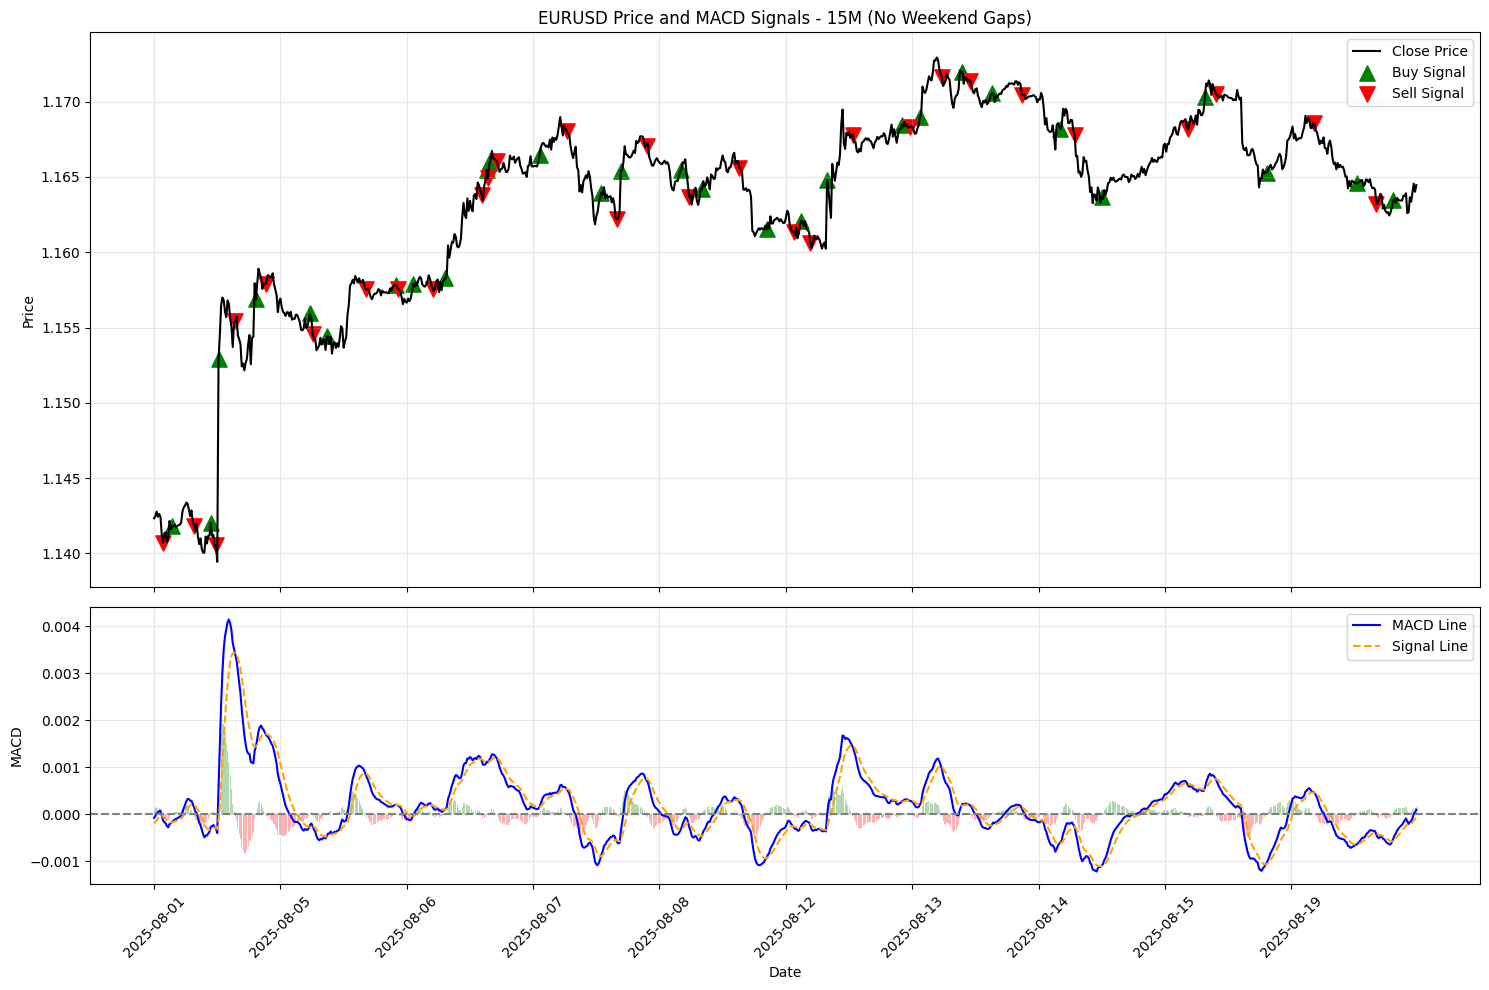

Chart saved: /Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/EURUSD/RSI_Signals_15M_20250801.png


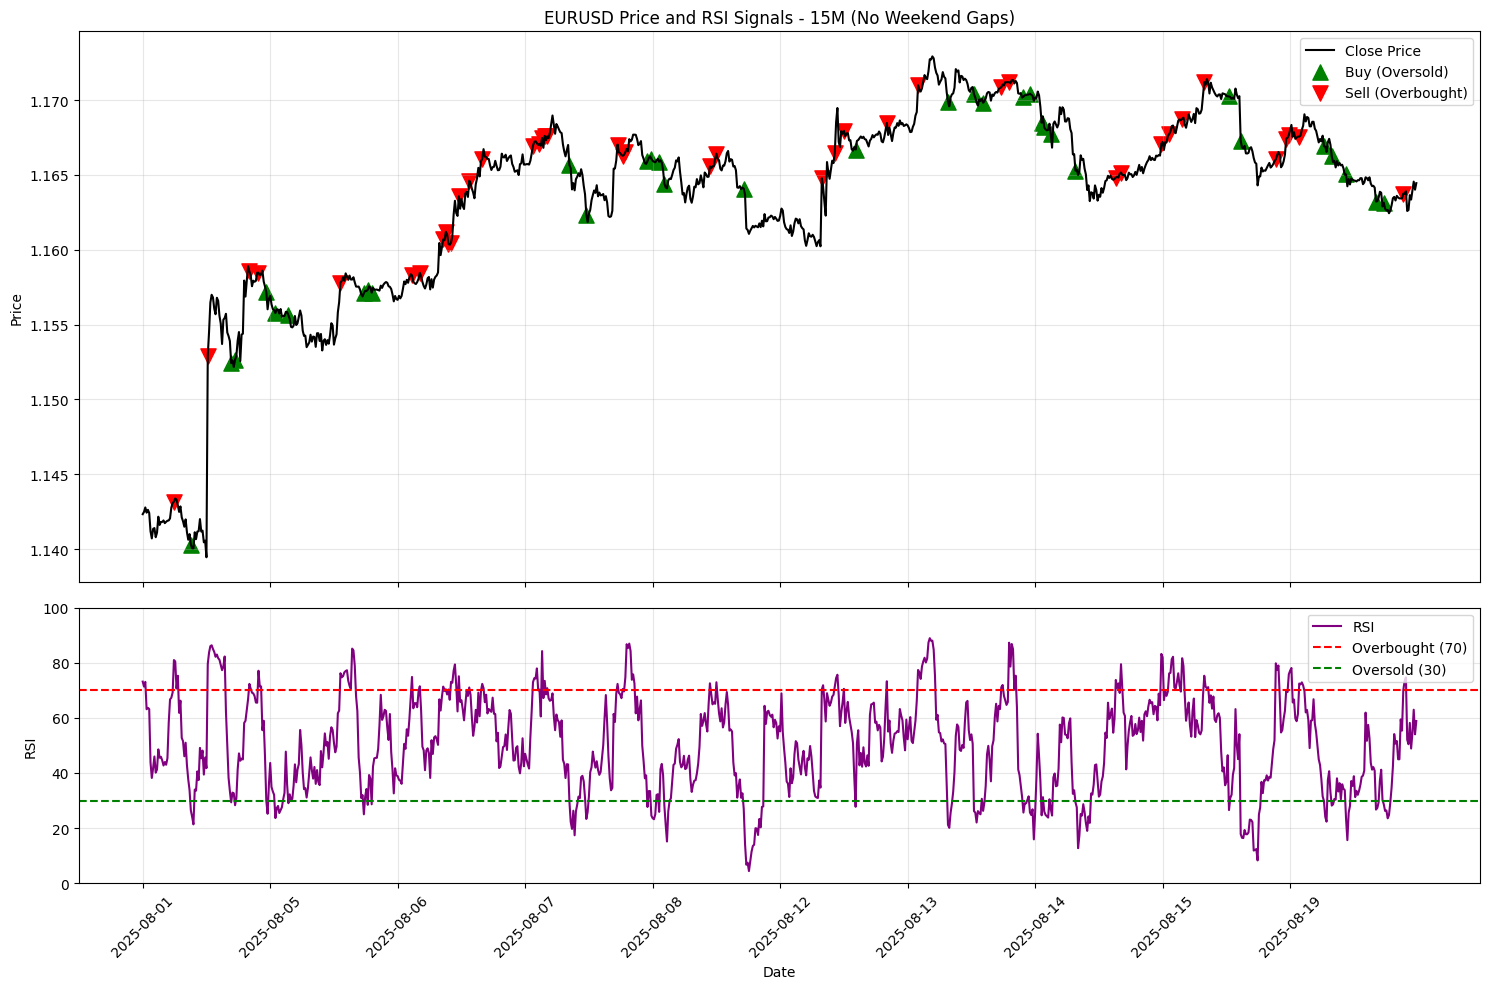

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Utility: Clean the data, parse Time as index, remove weekends/non-trading hours
def clean_trading_data_corrected(file_path):
    column_names = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Spread']
    try:
        df = pd.read_csv(
            file_path, 
            sep='\t', 
            header=0, 
            names=column_names, 
            index_col='Time', 
            parse_dates=True
        )
        numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Spread']
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(inplace=True)
        df.sort_index(inplace=True)
        df = df[df.index.weekday < 5]  # Remove Saturday (5) & Sunday (6)
        # Intraday filtering (for H1, M15)
        if 'H1' in file_path or 'M15' in file_path:
            df = df[~((df.index.weekday == 4) & (df.index.hour >= 22))]
            df = df[~((df.index.weekday == 0) & (df.index.hour < 22))]
        print(f"Data cleaning completed successfully: {df.shape}")
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Technical indicators (SMA, EMA, MACD, RSI)
def add_technical_indicators(df):
    df_with_ind = df.copy()
    df_with_ind['SMA_50'] = df_with_ind['Close'].rolling(window=50).mean()
    df_with_ind['SMA_200'] = df_with_ind['Close'].rolling(window=200).mean()
    df_with_ind['EMA_12'] = df_with_ind['Close'].ewm(span=12, adjust=False).mean()
    df_with_ind['EMA_26'] = df_with_ind['Close'].ewm(span=26, adjust=False).mean()
    df_with_ind['MACD'] = df_with_ind['EMA_12'] - df_with_ind['EMA_26']
    df_with_ind['MACD_Signal'] = df_with_ind['MACD'].ewm(span=9, adjust=False).mean()
    delta = df_with_ind['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df_with_ind['RSI'] = 100 - (100 / (1 + rs))
    print("✓ Technical indicators (SMA, EMA, MACD, RSI) added.")
    return df_with_ind

# Signal generation (SMA, EMA, MACD, RSI)
def generate_trading_signals(df):
    df_signals = df.copy()
    df_signals['SMA_Signal'] = np.where(df_signals['SMA_50'] > df_signals['SMA_200'], 1, -1)
    df_signals['EMA_Signal'] = np.where(df_signals['EMA_12'] > df_signals['EMA_26'], 1, -1)
    df_signals['MACD_Signal_Crossover'] = np.where(df_signals['MACD'] > df_signals['MACD_Signal'], 1, -1)
    df_signals['RSI_Signal'] = np.where(df_signals['RSI'] < 30, 1,
                                np.where(df_signals['RSI'] > 70, -1, 0))
    print("✓ Trading signals (SMA, EMA, MACD, RSI) generated.")
    return df_signals

# ==== PLOTTING WITHOUT GAPS ====
# Helper: Applies range index for plotting and gives readable trade date ticks
def _prepare_plot_data(df, start_date):
    subset = df[df.index >= start_date].copy().reset_index()
    subset['trade_index'] = range(len(subset))
    return subset

def _set_trade_xticks(ax, subset, tick_steps=10):
    tick_step = max(1, len(subset) // tick_steps)
    ticks = range(0, len(subset), tick_step)
    ticklabels = [subset['Time'].iloc[t].strftime('%Y-%m-%d') for t in ticks]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticklabels, rotation=45)

def plot_sma_crossover_signals(df, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily", save_chart=True):
    subset = _prepare_plot_data(df, start_date)
    subset['SMA_Crossover'] = subset['SMA_Signal'].diff()
    buy = subset[subset['SMA_Crossover'] > 0]
    sell = subset[subset['SMA_Crossover'] < 0]
    plt.figure(figsize=(15, 7))
    plt.plot(subset['trade_index'], subset['Close'], label='Close Price', color='black', alpha=0.7)
    plt.plot(subset['trade_index'], subset['SMA_50'], label='50 SMA', color='blue', linestyle='--')
    plt.plot(subset['trade_index'], subset['SMA_200'], label='200 SMA', color='orange', linestyle='--')
    plt.scatter(buy['trade_index'], buy['Close'], marker='^', color='green', s=120, label='Buy (Golden Cross)')
    plt.scatter(sell['trade_index'], sell['Close'], marker='v', color='red', s=120, label='Sell (Death Cross)')
    plt.title(f'{symbol} SMA Crossover - {timeframe} (No Weekend Gaps)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    ax = plt.gca()
    _set_trade_xticks(ax, subset)
    plt.tight_layout()
    
    if save_chart:
        filename = f"/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/{symbol}/SMA_Crossover_{timeframe}_{start_date.replace('-', '')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Chart saved: {filename}")
    
    plt.show()

def plot_macd_crossover_signals(df, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily", save_chart=True):
    subset = _prepare_plot_data(df, start_date)
    subset['MACD_Crossover'] = subset['MACD_Signal_Crossover'].diff()
    buy = subset[subset['MACD_Crossover'] > 0]
    sell = subset[subset['MACD_Crossover'] < 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, 
                                    gridspec_kw={'height_ratios':[2,1]})
    ax1.plot(subset['trade_index'], subset['Close'], label='Close Price', color='black')
    ax1.scatter(buy['trade_index'], buy['Close'], marker='^', color='green', s=120, label='Buy Signal')
    ax1.scatter(sell['trade_index'], sell['Close'], marker='v', color='red', s=120, label='Sell Signal')
    ax1.set_title(f'{symbol} Price and MACD Signals - {timeframe} (No Weekend Gaps)')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax2.plot(subset['trade_index'], subset['MACD'], label='MACD Line', color='blue')
    ax2.plot(subset['trade_index'], subset['MACD_Signal'], label='Signal Line', color='orange', linestyle='--')
    macd_hist = subset['MACD'] - subset['MACD_Signal']
    ax2.bar(subset['trade_index'], macd_hist, color=np.where(macd_hist > 0, 'g', 'r'), alpha=0.3)
    ax2.axhline(0, color='grey', linestyle='--')
    ax2.set_ylabel('MACD')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    _set_trade_xticks(ax2, subset)
    plt.xlabel('Date')
    plt.tight_layout()
    
    if save_chart:
        filename = f"/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/{symbol}/MACD_Signals_{timeframe}_{start_date.replace('-', '')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Chart saved: {filename}")
    
    plt.show()

def plot_ema_crossover_signals(df, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily", save_chart=True):
    subset = _prepare_plot_data(df, start_date)
    subset['EMA_Crossover'] = subset['EMA_Signal'].diff()
    buy = subset[subset['EMA_Crossover'] > 0]
    sell = subset[subset['EMA_Crossover'] < 0]
    plt.figure(figsize=(15, 7))
    plt.plot(subset['trade_index'], subset['Close'], label='Close Price', color='black', alpha=0.7)
    plt.plot(subset['trade_index'], subset['EMA_12'], label='12 EMA', color='blue', linestyle='--')
    plt.plot(subset['trade_index'], subset['EMA_26'], label='26 EMA', color='orange', linestyle='--')
    plt.scatter(buy['trade_index'], buy['Close'], marker='^', color='green', s=120, label='Buy (EMA Bullish)')
    plt.scatter(sell['trade_index'], sell['Close'], marker='v', color='red', s=120, label='Sell (EMA Bearish)')
    plt.title(f'{symbol} EMA Crossover - {timeframe} (No Weekend Gaps)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    ax = plt.gca()
    _set_trade_xticks(ax, subset)
    plt.tight_layout()
    
    if save_chart:
        filename = f"/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/{symbol}/EMA_Crossover_{timeframe}_{start_date.replace('-', '')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Chart saved: {filename}")
    
    plt.show()

def plot_rsi_signals(df, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily", save_chart=True):
    subset = _prepare_plot_data(df, start_date)
    buy = subset[(subset['RSI_Signal'] == 1) & (subset['RSI_Signal'].shift(1) == 0)]
    sell = subset[(subset['RSI_Signal'] == -1) & (subset['RSI_Signal'].shift(1) == 0)]
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, 
                                   gridspec_kw={'height_ratios':[2,1]})
    ax1.plot(subset['trade_index'], subset['Close'], label='Close Price', color='black')
    ax1.scatter(buy['trade_index'], buy['Close'], marker='^', color='green', s=120, label='Buy (Oversold)')
    ax1.scatter(sell['trade_index'], sell['Close'], marker='v', color='red', s=120, label='Sell (Overbought)')
    ax1.set_title(f'{symbol} Price and RSI Signals - {timeframe} (No Weekend Gaps)')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax2.plot(subset['trade_index'], subset['RSI'], label='RSI', color='purple')
    ax2.axhline(70, linestyle='--', color='red', label='Overbought (70)')
    ax2.axhline(30, linestyle='--', color='green', label='Oversold (30)')
    ax2.set_ylabel('RSI')
    ax2.set_ylim(0, 100)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    _set_trade_xticks(ax2, subset)
    plt.xlabel('Date')
    plt.tight_layout()
    
    if save_chart:
        filename = f"/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/results/{symbol}/RSI_Signals_{timeframe}_{start_date.replace('-', '')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Chart saved: {filename}")
    
    plt.show()

# ==== USAGE ====
# Charts are automatically saved to: /trading-automation/results/EURUSD/
# File naming: {ChartType}_{StartDate}.png (e.g., SMA_Crossover_20240101.png, EMA_Crossover_20240101.png)
# 1. Load and clean data
eurusd_D1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_D1.csv')
eurusd_H1_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_H1.csv')
eurusd_M15_df = clean_trading_data_corrected('/Users/pawan/Desktop/Quantwater Tech Investments/Operations/Internship/IIT Kanpur MBA Capstone Project/qti-internship-2025/trading-automation/data/forex/EURUSD_M15.csv')

# 2. Add indicators
eurusd_D1_ind = add_technical_indicators(eurusd_D1_df)
eurusd_H1_ind = add_technical_indicators(eurusd_H1_df)
eurusd_M15_ind = add_technical_indicators(eurusd_M15_df)

# 3. Add signals
eurusd_D1_sig = generate_trading_signals(eurusd_D1_ind)
eurusd_H1_sig = generate_trading_signals(eurusd_H1_ind)
eurusd_M15_sig = generate_trading_signals(eurusd_M15_ind)

# 4. Visualize WITHOUT weekend gaps!
print("\n--- Visualizing EURUSD Daily Signals without Gaps ---")
plot_sma_crossover_signals(eurusd_D1_sig, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily")
plot_ema_crossover_signals(eurusd_D1_sig, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily")
plot_macd_crossover_signals(eurusd_D1_sig, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily")
plot_rsi_signals(eurusd_D1_sig, start_date="2024-01-01", symbol="EURUSD", timeframe="Daily")

# For H1:
print("\n--- Visualizing EURUSD 1H Signals without Gaps ---")
plot_sma_crossover_signals(eurusd_H1_sig, start_date="2025-06-01", symbol="EURUSD", timeframe="1H")
plot_ema_crossover_signals(eurusd_H1_sig, start_date="2025-06-01", symbol="EURUSD", timeframe="1H")
plot_macd_crossover_signals(eurusd_H1_sig, start_date="2025-06-01", symbol="EURUSD", timeframe="1H")
plot_rsi_signals(eurusd_H1_sig, start_date="2025-06-01", symbol="EURUSD", timeframe="1H")

# For M15 (latest full month)
latest_date = eurusd_M15_sig.index.max()
latest_month_start = latest_date.replace(day=1)
print("\n--- Visualizing EURUSD M15 Signals for Latest Month (No Gaps) ---")
plot_sma_crossover_signals(eurusd_M15_sig, start_date=latest_month_start.strftime('%Y-%m-%d'), symbol="EURUSD", timeframe="15M")
plot_ema_crossover_signals(eurusd_M15_sig, start_date=latest_month_start.strftime('%Y-%m-%d'), symbol="EURUSD", timeframe="15M")
plot_macd_crossover_signals(eurusd_M15_sig, start_date=latest_month_start.strftime('%Y-%m-%d'), symbol="EURUSD", timeframe="15M")
plot_rsi_signals(eurusd_M15_sig, start_date=latest_month_start.strftime('%Y-%m-%d'), symbol="EURUSD", timeframe="15M")
